# 1- Data Acquisition

We are going to use a dataset that is already collected.

In [2]:
import pandas as pd
import json
from glob import glob
from sklearn.model_selection import train_test_split

In [3]:
def jsonl_to_dataframe(file_path):
    """Fonction pour lire un fichier JSONL et retourner un DataFrame pandas"""
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line))
    return pd.DataFrame(data)

def merge_jsonl_to_dataframe(file_pattern):
    """Fonction pour fusionner plusieurs fichiers JSONL en un seul DataFrame pandas"""
    # Récupérer la liste des fichiers correspondant au modèle fourni
    files = glob(file_pattern)
    
    
    # Lire chaque fichier JSONL et stocker les DataFrames individuels dans une liste
    dfs = [jsonl_to_dataframe(file) for file in files]
    # Concaténer les DataFrames
    merged_df = pd.concat(dfs, ignore_index=True)
    
    return merged_df

# Modèle de chemin vers les fichiers JSONL à fusionner
file_pattern = "data/*.jsonl"

# Appel de la fonction pour fusionner les fichiers JSONL en un DataFrame
df = merge_jsonl_to_dataframe(file_pattern)

# Afficher le DataFrame fusionné
len(df)

48644

In [4]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(len(train_df))
len(test_df)

38915


9729

In [5]:
train_df.head()

,question,human_answers,chatgpt_answers,index,source
32520,"The Price is Right did NOT give away 215,000 p...",[There are a few possibilities here : 1 ) The ...,"[Game shows like ""The Price is Right"" typicall...",NaN,NaN
34336,Grinding teeth / clenching jaw in sleep What c...,[It 's actually a condition . URL_0 I wear a m...,[Grinding teeth and clenching the jaw while yo...,NaN,NaN
32715,When saline or other medicine is given to pati...,[It can but in most cases it is n't wo n't ! F...,[When saline solution or other medications are...,NaN,NaN
44579,What is an API and how is it used ? If you are...,[API - Application Programming Interface - thi...,"[An API, or Application Programming Interface,...",NaN,NaN
14761,The Arguments Against Nuclear Power I feel lik...,[[ TED Debate : Does the world need nuclear en...,[Nuclear power is a method of generating elect...,NaN,reddit_eli5


In [6]:
test_df.head()

,question,human_answers,chatgpt_answers,index,source
1941,LDAP I use it every day and I still ca n't wra...,[Its a giant phonebook that provides informati...,[Sure! LDAP stands for Lightweight Directory A...,334.0,reddit_eli5
40004,"Does a microwave take time to "" warm up "" ? Is...",[The output remains the same regardless of how...,"[A microwave does not need to ""warm up"" like a...",NaN,NaN
15107,Gametheory In particular how do I find the Nas...,[jumpup has decent explanations but misses qui...,[Sure! Let's start with the Nash Equilibrium.\...,NaN,reddit_eli5
25858,who designed the statue of liberty,[The Statue of Liberty (Liberty Enlightening t...,[The Statue of Liberty was designed by French ...,NaN,NaN
29186,"Rocky Horror Show Seriously , the ending left ...",[Omigod I love that movie so much . ( Do n't j...,[The Rocky Horror Show is a musical with a cul...,NaN,NaN


In [7]:
train_df.source.value_counts()

source
reddit_eli5    13721
finance         3154
medicine        1017
open_qa          949
wiki_csai        656
Name: count, dtype: int64

# 2. Exploring the data

Whenever we start working with a new dataset, and before we move on to making design decisions and creating a model, we have to get to know our data. Let’s answer some questions regarding our dataset:

**What does human_answers or chatgpt_answers looks like?**

In [8]:
train_df.human_answers[0]

['Basically there are many categories of " Best Seller " . Replace " Best Seller " by something like " Oscars " and every " best seller " book is basically an " oscar - winning " book . May not have won the " Best film " , but even if you won the best director or best script , you \'re still an " oscar - winning " film . Same thing for best sellers . Also , IIRC the rankings change every week or something like that . Some you might not be best seller one week , but you may be the next week . I guess even if you do n\'t stay there for long , you still achieved the status . Hence , # 1 best seller .',
 "If you 're hearing about it , it 's because it was a very good or very well - publicized book ( or both ) , and almost every good or well - publicized book will be # 1 on the NY Times bestseller list for at least a little bit . Kindof like how almost every big or good movies are # 1 at the box office on their opening weekend .",
 "One reason is lots of catagories . However , how the NY Ti

In [9]:
train_df.chatgpt_answers[0]

['There are many different best seller lists that are published by various organizations, and the New York Times is just one of them. The New York Times best seller list is a weekly list that ranks the best-selling books in the United States based on sales data from a number of different retailers. The list is published in the New York Times newspaper and is widely considered to be one of the most influential best seller lists in the book industry. \nIt\'s important to note that the New York Times best seller list is not the only best seller list out there, and there are many other lists that rank the top-selling books in different categories or in different countries. So it\'s possible that a book could be a best seller on one list but not on another. \nAdditionally, the term "best seller" is often used more broadly to refer to any book that is selling well, regardless of whether it is on a specific best seller list or not. So it\'s possible that you may hear about a book being a "bes

**How long are the responses? from humans? from chatgpt?**

Mean responses length:  2.4094308107413593
Min overview length:  1
Max overview length:  3


<Axes: ylabel='Frequency'>

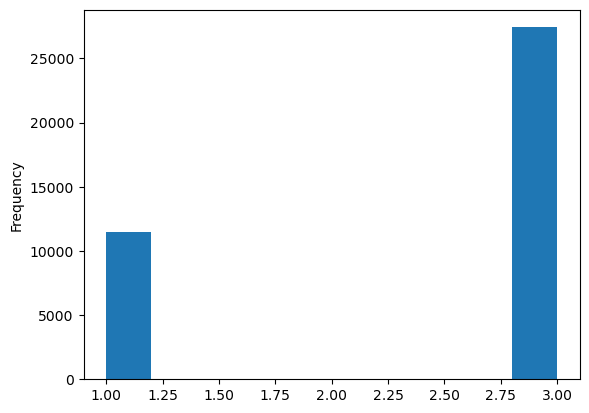

In [10]:
#Human 

train_df['responses_length'] = train_df.human_answers.apply(len)
print("Mean responses length: ", train_df['responses_length'].mean())
print("Min overview length: ", train_df['responses_length'].min())
print("Max overview length: ", train_df['responses_length'].max())
train_df.responses_length.plot.hist()

Mean responses length:  1.10517795194655
Min overview length:  0
Max overview length:  3


<Axes: ylabel='Frequency'>

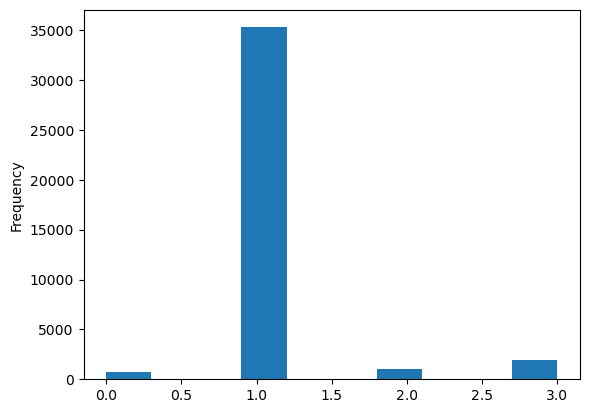

In [11]:
#Chatgpt

train_df['responses_length'] = train_df.chatgpt_answers.apply(len)
print("Mean responses length: ", train_df['responses_length'].mean())
print("Min overview length: ", train_df['responses_length'].min())
print("Max overview length: ", train_df['responses_length'].max())
train_df.responses_length.plot.hist()

**A word cloud to see what are the most common words in the responses**

In [ ]:
#Human
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
action = movies_data[movies_data['target'] == True]
action_text = action['Description'].values
wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(str(action_text))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#Chatgpt

#we will create a word cloud to see the most common words in the descriptions if the movie is action
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
action = movies_data[movies_data['target'] == True]
action_text = action['Description'].values
wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(str(action_text))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()